In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_context('poster')

In [4]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#libraries for evaluation
from sklearn.metrics import mean_squared_log_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV,RidgeCV
from yellowbrick.regressor import AlphaSelection

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [5]:
df2 = pd.read_excel('Final_v2.xlsx')
df2.head()

,name,price,km,owner,year,fuel,location
0,Honda City VX Diesel,1025000,"24,000 KMs",1 Owner,2018,Diesel,Delhi
1,Honda City ZX VTEC,299000,"76,347 KMs",2 Owners,2007,Petrol,Bangalore
2,Honda WR-V VX MT Diesel,750000,"41,855 KMs",1 Owner,2017,Diesel,Navi Mumbai
3,Honda Civic 1.8V AT,320000,"66,867 KMs",1 Owner,2007,Petrol,Hyderabad
4,Honda City 1.5 V AT,350000,"57,409 KMs",2 Owners,2011,Petrol,Mumbai


In [6]:
## Check the numeric and catagorical variales 

print(df2["fuel"].unique())
print(df2["owner"].unique())
print(df2["location"].unique())


['Diesel' 'Petrol' 'LPG' 'Hybrid' 'CNG' 'fuel' 'Electric']
['1 Owner' '2 Owners' nan '3 Owners' 'owner' '4+ Owners']
['Delhi' 'Bangalore' 'Navi Mumbai' 'Hyderabad' 'Mumbai' 'Kolkata' 'Thane'
 'Chennai' 'Ahmedabad' 'Bhopal' 'Pune' 'Noida' 'Coimbatore' 'Nashik'
 'Jaipur' 'Gurgaon' 'Faridabad' 'Nagpur' 'Kollam' 'Jamshedpur'
 'Aurangabad' 'Ghaziabad' 'Surat' 'Vadodara' 'Lucknow' 'Tiruchirappalli'
 'Raipur' 'Rajkot' 'Indore' 'Akola' 'Ranchi' 'location' 'Karnal'
 'Kalamassery' 'Kochi' 'Bellary' 'Mangalore' 'Mysore' 'Pondicherry'
 'Thiruvananthapuram']


In [7]:
df2['location'].value_counts()

Mumbai                866
Delhi                 445
Hyderabad             435
Bangalore             321
Pune                  266
Chennai               243
Ahmedabad             146
Kolkata               135
Thane                 131
Coimbatore            118
Jaipur                 60
Nashik                 56
Bhopal                 53
Noida                  49
Navi Mumbai            47
Gurgaon                35
Faridabad              33
Ghaziabad              28
Thiruvananthapuram     24
Bellary                23
Mangalore              23
Kollam                 22
Aurangabad             22
Mysore                 22
Nagpur                 12
Lucknow                12
Pondicherry            10
Indore                  7
Karnal                  7
Kalamassery             6
Surat                   6
Vadodara                5
Tiruchirappalli         5
Kochi                   5
Jamshedpur              4
Raipur                  3
Akola                   2
Rajkot                  2
Ranchi      

In [8]:
df2.dtypes

name        object
price       object
km          object
owner       object
year        object
fuel        object
location    object
dtype: object

In [9]:
len(df2.loc[:,'location'].unique())

40

In [10]:
df2.drop(df2.loc[df2['location']=='Ranchi'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Rajkot'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Akola'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Raipur'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Jamshedpur'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Tiruchirappalli'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Vadodara'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Surat'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Kalamassery'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Indore'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Kochi'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='Karnal'].index, inplace=True)
df2.drop(df2.loc[df2['location']=='location'].index, inplace=True)


In [11]:
df2['location'].value_counts()

Mumbai                866
Delhi                 445
Hyderabad             435
Bangalore             321
Pune                  266
Chennai               243
Ahmedabad             146
Kolkata               135
Thane                 131
Coimbatore            118
Jaipur                 60
Nashik                 56
Bhopal                 53
Noida                  49
Navi Mumbai            47
Gurgaon                35
Faridabad              33
Ghaziabad              28
Thiruvananthapuram     24
Mangalore              23
Bellary                23
Kollam                 22
Mysore                 22
Aurangabad             22
Nagpur                 12
Lucknow                12
Pondicherry            10
Name: location, dtype: int64

In [12]:
len(df2.loc[:,'location'].unique())

27

In [13]:
df2.shape

(3637, 7)

In [14]:
df2["location"].replace({"Ghaziabad": "Delhi","Noida":"Delhi","Gurgaon":"Delhi","Faridabad":"Delhi"}, inplace=True)

df2["location"].replace({"Mangalore": "Bangalore","Mysore":"Bangalore","Bellary":"Bangalore"}, inplace=True)

df2["location"].replace({"Pondicherry": "Chennai"}, inplace=True)

df2["location"].replace({"Kollam": "Thiruvananthapuram"}, inplace=True)

df2["location"].replace({"Lucknow": "Bhopal"}, inplace=True)

df2["location"].replace({"Aurangabad": "Nagpur", "Nashik": "Nagpur"}, inplace=True)

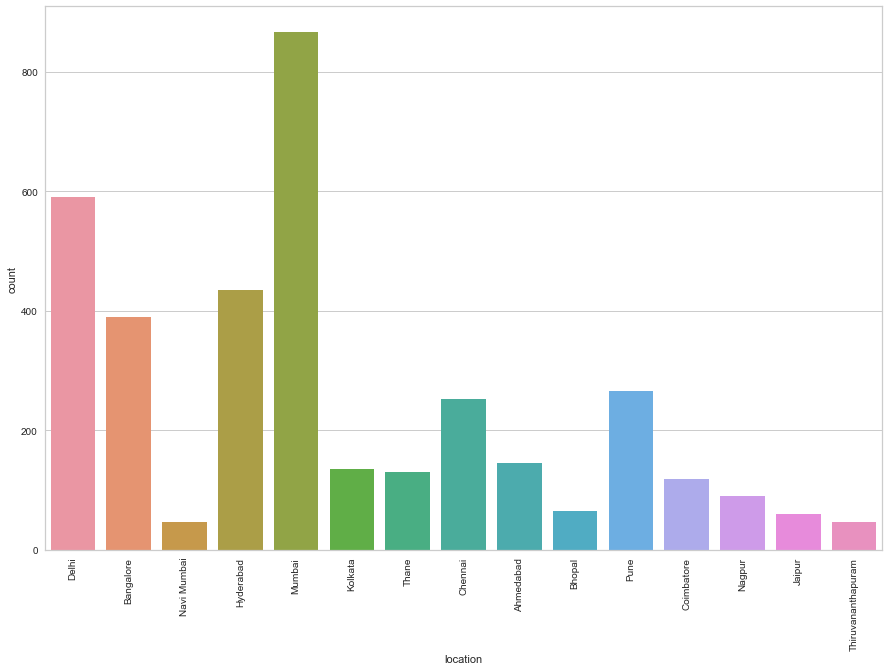

In [15]:
plt.figure(figsize=(15,10))
sns.countplot(x='location',data= df2)
plt.xticks(rotation=90)
plt.show()

In [16]:
df2.isnull().sum()

name         0
price        0
km           0
owner       17
year         0
fuel         0
location     0
dtype: int64

In [17]:
len(df2.name.unique())

1391

In [18]:
df2.describe()

,name,price,km,owner,year,fuel,location
count,3637,3637,3637,3620,3637,3637,3637
unique,1391,747,1679,4,22,6,15
top,Volkswagen Polo GT TSI,475000,"60,000 KMs",1 Owner,2017,Diesel,Mumbai
freq,33,55,52,3042,509,1827,866


In [19]:
df2.head()

,name,price,km,owner,year,fuel,location
0,Honda City VX Diesel,1025000,"24,000 KMs",1 Owner,2018,Diesel,Delhi
1,Honda City ZX VTEC,299000,"76,347 KMs",2 Owners,2007,Petrol,Bangalore
2,Honda WR-V VX MT Diesel,750000,"41,855 KMs",1 Owner,2017,Diesel,Navi Mumbai
3,Honda Civic 1.8V AT,320000,"66,867 KMs",1 Owner,2007,Petrol,Hyderabad
4,Honda City 1.5 V AT,350000,"57,409 KMs",2 Owners,2011,Petrol,Mumbai


In [20]:
df2.dtypes

name        object
price       object
km          object
owner       object
year        object
fuel        object
location    object
dtype: object

In [21]:
df2['owner'].unique()

array(['1 Owner', '2 Owners', nan, '3 Owners', '4+ Owners'], dtype=object)

In [22]:
# changing the na values to zero
df2['owner'] = df2['owner'].fillna(0)

In [21]:
# mapping null vales to 2 owners 
df2["owner"].replace({ 0: "1 Owners"}, inplace=True)

In [22]:
df2['owner'].unique()

array(['1 Owner', '2 Owners', '1 Owners', '3 Owners', '4+ Owners'],
      dtype=object)

In [23]:
def rem_kms(x):
    y=x.replace(',',"")
    return y[:-4]

In [24]:
df2['km']=df2['km'].apply(rem_kms)

In [25]:
df2.head()

,name,price,km,owner,year,fuel,location
0,Honda City VX Diesel,1025000,24000,1 Owner,2018,Diesel,Delhi
1,Honda City ZX VTEC,299000,76347,2 Owners,2007,Petrol,Bangalore
2,Honda WR-V VX MT Diesel,750000,41855,1 Owner,2017,Diesel,Navi Mumbai
3,Honda Civic 1.8V AT,320000,66867,1 Owner,2007,Petrol,Hyderabad
4,Honda City 1.5 V AT,350000,57409,2 Owners,2011,Petrol,Mumbai


In [26]:
def rem_ownerfig(x):
    return x[0]

In [27]:
df2['owner']=df2['owner'].apply(rem_ownerfig)

In [28]:
df2.head()

,name,price,km,owner,year,fuel,location
0,Honda City VX Diesel,1025000,24000,1,2018,Diesel,Delhi
1,Honda City ZX VTEC,299000,76347,2,2007,Petrol,Bangalore
2,Honda WR-V VX MT Diesel,750000,41855,1,2017,Diesel,Navi Mumbai
3,Honda Civic 1.8V AT,320000,66867,1,2007,Petrol,Hyderabad
4,Honda City 1.5 V AT,350000,57409,2,2011,Petrol,Mumbai


In [29]:
df2['owner'].dtype

dtype('O')

In [30]:
df2['km']=df2['km'].astype('float64')
df2['price']=df2['price'].astype('float64')
df2['year']=df2['year'].astype('int64')
df2['owner']=df2['owner'].astype('int64')

In [31]:
df2.dtypes

name         object
price       float64
km          float64
owner         int64
year          int64
fuel         object
location     object
dtype: object

In [32]:
# creating a year feture
df2['cars_age']=2021-df2.year


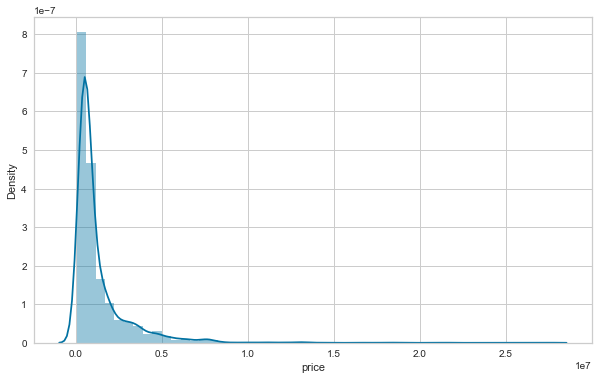

In [33]:
plt.figure(figsize=(10,6))
sns.distplot(df2.price)
plt.show()

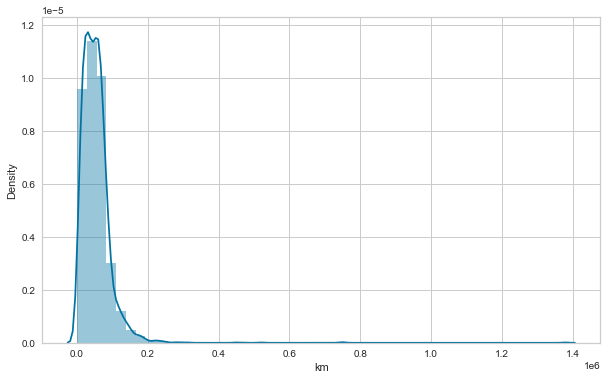

In [34]:
plt.figure(figsize=(10,6))
sns.distplot(df2.km)
plt.show()

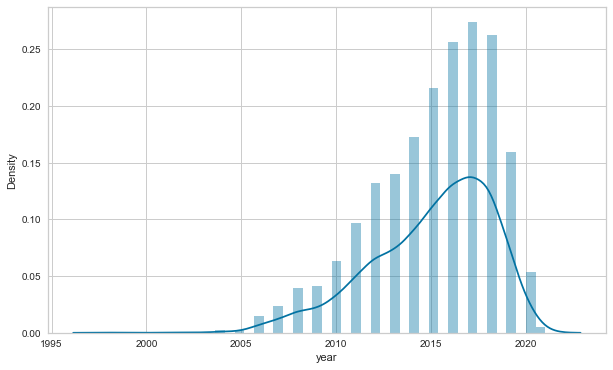

In [35]:
plt.figure(figsize=(10,6))
sns.distplot(df2.year)
plt.show()

In [36]:
# plt.figure(figsize=(10,6))
# sns.countplot(df2.name)
# plt.show()

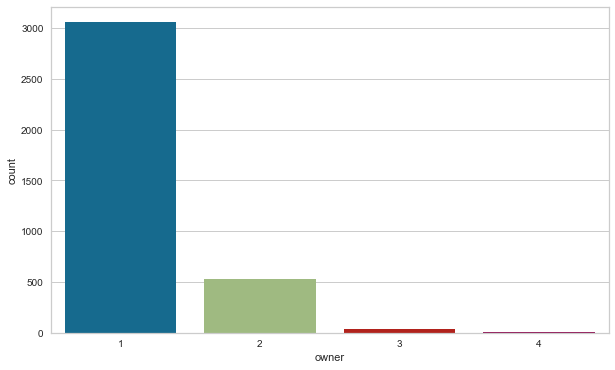

In [37]:

plt.figure(figsize=(10,6))
sns.countplot(df2.owner)
plt.show()

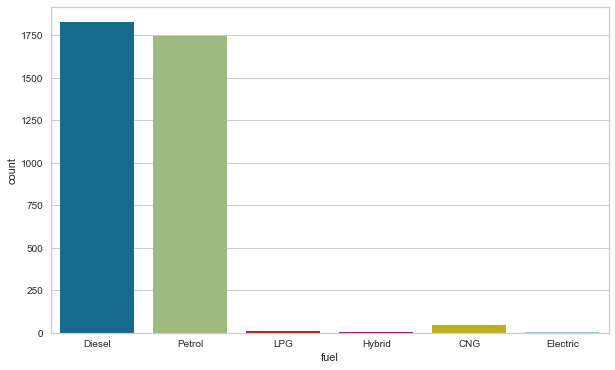

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(df2.fuel)
plt.show()

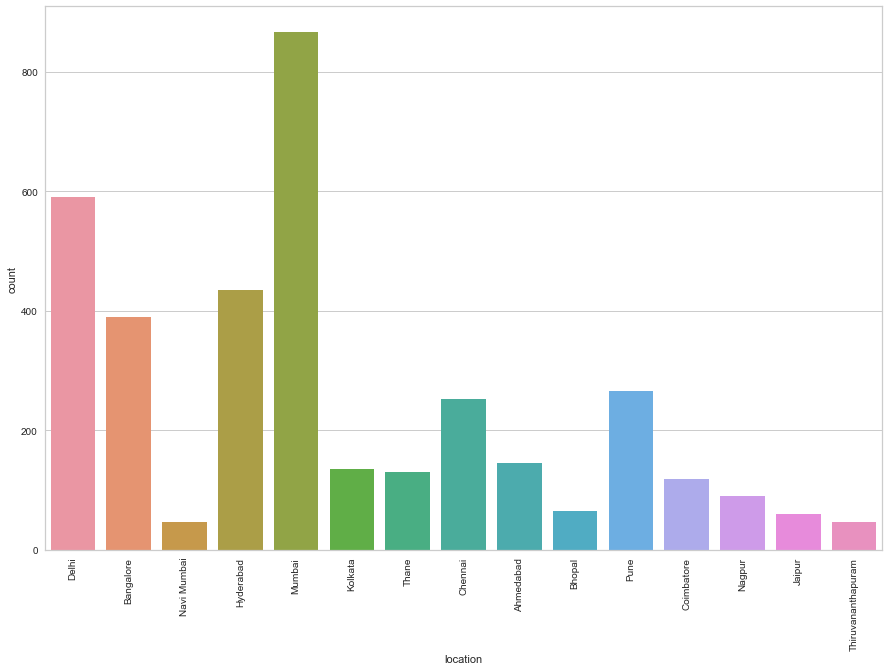

In [39]:
plt.figure(figsize=(15,10))
sns.countplot(x='location',data= df2)
plt.xticks(rotation=90)
plt.show()

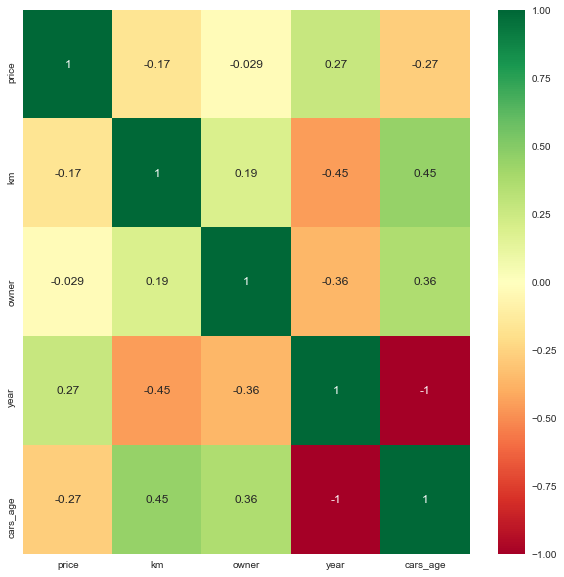

In [40]:

#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [41]:
df2.head(2)

,name,price,km,owner,year,fuel,location,cars_age
0,Honda City VX Diesel,1025000.0,24000.0,1,2018,Diesel,Delhi,3
1,Honda City ZX VTEC,299000.0,76347.0,2,2007,Petrol,Bangalore,14


In [42]:
# dep=df2.drop(['price','name','year'],axis=1)
# dep.head()

In [43]:
df2.shape

(3637, 8)

In [44]:
df2.reset_index(drop = True)

,name,price,km,owner,year,fuel,location,cars_age
0,Honda City VX Diesel,1025000.0,24000.0,1,2018,Diesel,Delhi,3
1,Honda City ZX VTEC,299000.0,76347.0,2,2007,Petrol,Bangalore,14
2,Honda WR-V VX MT Diesel,750000.0,41855.0,1,2017,Diesel,Navi Mumbai,4
3,Honda Civic 1.8V AT,320000.0,66867.0,1,2007,Petrol,Hyderabad,14
4,Honda City 1.5 V AT,350000.0,57409.0,2,2011,Petrol,Mumbai,10
...,...,...,...,...,...,...,...,...
3632,Maruti Suzuki Alto 800 Lxi CNG,310000.0,30661.0,1,2014,CNG,Thane,7
3633,Mahindra KUV100 K4 Plus D 5 STR,395000.0,31000.0,1,2016,Diesel,Pune,5
3634,Honda Amaze 1.2 S i-VTEC,340000.0,54000.0,1,2013,Petrol,Delhi,8
3635,Datsun redi-GO T (O) [2016-2019],345600.0,23142.0,1,2017,Petrol,Hyderabad,4


In [45]:
from sklearn.model_selection import train_test_split

In [46]:

y = df2['price']

In [47]:
y.head()

0    1025000.0
1     299000.0
2     750000.0
3     320000.0
4     350000.0
Name: price, dtype: float64

In [48]:
y.dtype

dtype('float64')

In [2]:
df_cont=df2[['km','cars_age']]

NameError: name 'df2' is not defined

In [50]:
df_cat=df2[['name','owner','location','fuel']]

In [51]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(df_cont)
transformed=pt.transform(df_cont)


In [1]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled[col_names] = scaler.fit_transform(df_cont)
df_scaled

NameError: name 'df_cont' is not defined

In [52]:
df_transformed=pd.DataFrame(data=transformed,columns=['km','cars_age'])

In [53]:
df_transformed.shape

(3637, 2)

In [54]:
df_dum=pd.get_dummies(df_cat,drop_first=True)

In [55]:
df_dum.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691],
           dtype='int64', length=3637)

In [56]:
df_transformed.index

RangeIndex(start=0, stop=3637, step=1)

In [57]:
df_transformed.shape

(3637, 2)

In [58]:
df_dum.shape

(3637, 1410)

In [59]:
from sklearn.model_selection import train_test_split
X=pd.merge(df_transformed,df_dum,on=df_transformed.index)


In [60]:
X.head()

,key_0,km,cars_age,owner,name_Aston Martin V8 Vantage N420,name_Audi A3 35 TDI Premium,name_Audi A3 35 TDI Premium Plus,name_Audi A3 35 TDI Premium Plus + Sunroof,name_Audi A3 35 TFSI Premium Plus,name_Audi A3 Cabriolet 40 TFSI,...,location_Nagpur,location_Navi Mumbai,location_Pune,location_Thane,location_Thiruvananthapuram,fuel_Diesel,fuel_Electric,fuel_Hybrid,fuel_LPG,fuel_Petrol
0,0,-0.763879,-0.957724,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,0.785182,2.012188,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,-0.087808,-0.524226,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,3,0.578534,2.012188,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0.351015,1.222354,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
X.drop(columns=['key_0'],axis=1,inplace=True)

In [62]:
y.shape

(3637,)

In [63]:

X =pd.merge(df_transformed,df_dum,on=df_transformed.index)
y = df2.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
X_train.index

Int64Index([2978, 2722, 1061, 2812, 1210, 1811, 3080, 1475,  576,  926,
            ...
             466, 2169, 1638, 3092, 1095, 1130, 1294,  860, 3507, 3174],
           dtype='int64', length=2909)

In [65]:
y_train


array([ 711111., 3250000.,  865000., ...,  680000.,  375000.,  535000.])

In [66]:
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [67]:
r2_score(y_test,y_pred)


-2.1483599342838886

ValueError: Expected 2D array, got 1D array instead:
array=[ 7.45700004e+05  5.12377876e+05  3.39363665e+05  2.94139816e+05
  1.77517190e+06  2.38841895e+05  3.82442370e+05  6.57901163e+06
  2.29361469e+05  1.95646203e+05  3.49836147e+05  1.17191218e+06
  6.01920354e+05  6.20508642e+06  4.36514651e+05  3.25171683e+05
  4.31660920e+05  1.66695681e+06  9.93811719e+05  6.49834109e+06
  2.82465639e+06  2.86113967e+05  4.01742105e+06  4.10815301e+06
  8.89433882e+05  5.87756485e+05  5.50476592e+06  6.47677844e+05
  2.05695656e+05  7.27959983e+06  6.83622869e+05  6.70911711e+06
  4.42532811e+05  5.87658279e+06  3.26244662e+06  8.33473943e+05
  2.39974280e+06  4.87726588e+05  5.86065756e+06  3.64234133e+05
  7.30155797e+06  5.65302698e+06  6.00473253e+06  6.12030164e+05
  8.53850802e+05  1.47350019e+06  1.20236381e+05  5.33448774e+05
  1.18360649e+06  7.07373611e+05  6.46849852e+06  7.52042938e+05
  5.64053851e+06  5.27380780e+05  2.06735238e+05  4.41654384e+06
  1.78410698e+06  3.01548512e+05  2.87451557e+05  1.67442489e+06
  1.91499665e+05  1.19198404e+06  5.18870268e+05  6.94099697e+06
  3.58835779e+05  7.07490422e+05  4.53641314e+05  6.34190118e+06
  1.92162252e+05  6.51158064e+06  6.48112557e+06  5.96470889e+06
  1.02188244e+06  6.74158844e+05  4.20771840e+05  4.60293385e+06
  1.09589363e+06  1.02514889e+06  3.87023773e+05  5.16752029e+05
  5.99573899e+06  3.09762907e+05  6.94184128e+06  6.82770412e+06
  3.59827624e+05  4.35935969e+05  2.49477252e+06 -2.26263783e+04
  5.12410884e+05  7.41648050e+05  3.96754476e+05  1.85750238e+05
  5.40979187e+05  3.59036589e+05  1.83316248e+06  6.48868743e+06
  7.18245388e+05  8.67672029e+05  6.44770343e+06  1.27872709e+06
  6.73338259e+05  1.65944745e+06  2.89739127e+06  2.29618005e+05
  1.85696278e+06  3.55503484e+06  8.56616539e+05  1.81139426e+06
  8.24995452e+05  5.62591868e+06  6.38355878e+06  4.03276157e+06
  8.86038157e+05  4.55125551e+05  8.70349520e+05  7.77415722e+05
  6.52343736e+06  2.41203731e+05  7.12555504e+06  3.66612362e+06
  6.71879162e+06  5.47250659e+05  6.12711217e+05  1.03912286e+06
  6.07088490e+06  5.30074796e+05  6.19886332e+06  2.13947940e+06
  1.63611791e+06  6.89668855e+06  2.90569943e+06 -1.51841237e+05
  5.24928076e+05  1.31487020e+06  8.56472745e+05  1.11971359e+06
  2.88595204e+06  6.89497531e+06  6.60623988e+06  7.65009142e+05
  5.93823578e+06  1.56452205e+06  9.19700145e+05  4.30074538e+05
  3.49135962e+05  5.79485526e+05  1.76761791e+06  6.50061839e+06
  7.12651730e+05  6.41510565e+06  1.42481163e+06  1.18558939e+05
  5.73421740e+06  7.68863539e+05  8.33041000e+05  9.75820211e+05
  5.97535164e+06  7.15018668e+06  1.12934810e+06  5.63448508e+06
  5.78780509e+06  8.16612833e+05  7.04596230e+06  1.19452332e+06
  6.41357914e+06  1.00185423e+06  2.94736873e+05  8.61927339e+04
  8.33729170e+05 -2.04117767e+04  3.78345944e+05  1.72826375e+06
  5.05101591e+05  1.16525874e+06  1.75844372e+06  6.72527003e+06
  1.77937857e+06  5.35760566e+06  6.44755161e+05  7.02982186e+04
  2.93010247e+06  6.03499788e+06  5.59102490e+05  7.18643905e+05
  2.13762878e+05  6.10919524e+06  3.25575594e+05  5.75129361e+05
  6.23564916e+06  5.84107549e+06  3.57891368e+05  5.72562254e+05
  1.27424377e+05  6.90082379e+05  2.40603048e+05  5.03558194e+06
  6.07830202e+06  5.99170040e+05  2.97776615e+06  6.88108072e+06
  2.38525769e+06  1.24646541e+05  5.71505507e+05  1.66847925e+06
  1.77641707e+06  1.56098726e+06  4.52863599e+06  7.40549011e+05
  4.82364423e+05  6.54916750e+06  6.54494546e+06  9.14799263e+05
  3.75664733e+06  1.01653303e+06  7.62023952e+05  2.07053065e+06
  2.85857418e+06  4.37130846e+05  3.36130431e+05  4.00399157e+05
  2.25014528e+06  1.77785911e+05  1.19839214e+06  2.24497975e+05
  6.46807594e+06  6.86995716e+05  2.00399395e+06  2.88353170e+05
  1.99717941e+05  1.42353469e+06  1.19384787e+05  4.14607563e+06
  6.27912329e+06  5.08200999e+05  5.31128992e+05  1.55755005e+05
  3.45326255e+05  7.89543133e+05  6.74988942e+06  1.56289105e+06
  5.93260948e+06  9.94753698e+04  3.42488900e+06  9.82557076e+06
  3.00101369e+06  2.53507911e+05  6.11600980e+05  5.85724636e+06
  1.00522333e+06  9.13961435e+05  2.89980879e+04  5.82695365e+05
  1.39386742e+06  7.28601392e+05  7.34540217e+06  1.23693842e+06
  2.12697690e+06  3.95384188e+05  2.54483518e+06  5.18390444e+05
  1.19745416e+06  1.25617423e+06  6.42691896e+04  5.17732005e+05
  6.74465999e+05  2.86560976e+05  3.32119722e+05  6.57326062e+05
  5.36120979e+05  5.72277706e+06  1.53054980e+06  5.24351891e+05
  1.02430840e+06  7.16939018e+05  6.18180316e+06  3.74682034e+05
  4.61974002e+05  2.33333000e+05  1.01553016e+06  9.32003190e+05
  6.25900503e+06  6.61322877e+06  5.55742327e+05  4.44058697e+05
  4.90875559e+06  5.62372565e+05  4.00032996e+05  4.03655931e+05
  7.08609761e+06  6.26568602e+06  6.26111781e+05  4.22313019e+05
  6.60746915e+06  5.23871050e+05  3.53250488e+05  7.01056115e+06
  6.90606403e+06  2.33053892e+06  6.25451666e+05  6.07938568e+06
  5.76099686e+06  1.43391999e+06  3.81314914e+05  6.65634488e+05
  6.23314870e+06  5.22837742e+05  2.91134451e+06  8.85296709e+05
  7.50260290e+05  9.76085932e+05  7.26678752e+06  1.33434748e+06
  5.12162604e+05  6.72929288e+05  6.08123292e+06  6.87384656e+06
 -8.37669595e+04  6.99355533e+06  7.10581493e+06  6.45195881e+06
  2.04029582e+06  7.00619914e+05  6.57289360e+05  6.50311749e+06
  1.25442934e+06  7.64459490e+05  6.29177493e+06  7.27500850e+06
  3.52149518e+05  4.16290727e+06  2.39057036e+05  6.75715213e+05
  6.33348658e+06  5.89761538e+05  1.31991894e+06 -1.15047239e+05
  6.90918359e+06  7.11446959e+06  1.80442804e+06  7.65583124e+05
  1.67594288e+05  5.95751867e+05  1.80659520e+06  2.58286488e+05
  4.06824241e+05  3.85741639e+06  9.55020260e+05  2.46984480e+05
  7.29969629e+05  6.05531381e+05  3.20491892e+06  2.21884142e+06
  6.60541999e+06  6.66005374e+06  3.24962402e+06  5.87027526e+06
  2.38010828e+06  3.42548194e+06  1.92220756e+06  6.44345496e+06
  1.07954067e+06  6.24704671e+05  4.47892501e+06  1.60329980e+06
  2.95050050e+06  2.96238142e+06  3.55141804e+06  6.86373945e+05
  6.93060094e+06  6.30940800e+06  2.34606790e+05  8.70650814e+05
  8.21474265e+05  1.45487464e+06  4.25913042e+06  6.14670257e+05
  3.28402052e+05  5.78569217e+06  4.02052817e+04  1.08429265e+05
  6.91702437e+06  2.09051765e+05  7.32708950e+05  3.91221139e+05
  1.51370438e+06  4.35117044e+05  3.93911410e+06  6.96999065e+05
  1.82226844e+06  5.92051952e+05  6.87720450e+06  6.64123954e+06
  6.53211437e+06  9.47287437e+05  3.72552427e+05  6.29497267e+05
  5.86562728e+06  9.54736932e+05  6.13882491e+06  6.24770628e+05
  4.47277301e+06  1.48648541e+06  3.97882413e+05  5.03290692e+05
  1.95834217e+05  1.41447181e+06  9.27744065e+05  1.20120080e+06
  8.92211427e+05  2.03625260e+06  3.56285511e+06  6.85143258e+06
  5.87111387e+05  1.49473635e+06  6.26054639e+06  6.32022869e+06
  4.76613264e+05  1.87028670e+06  1.22756221e+06  2.36775834e+06
  2.21699062e+05  6.56514341e+05  6.30002104e+06  6.04661416e+06
  6.14586276e+05  5.84118434e+05  5.89835511e+05  7.93137755e+05
  1.75006228e+06  5.84632089e+05  3.42368599e+05  3.69579810e+05
  2.17211432e+05  6.44783979e+05  1.00158914e+07  5.80707958e+06
  2.86949497e+05  1.19329260e+06  6.42767260e+05  7.55759466e+05
  3.86963922e+05  9.09817023e+05  1.03981117e+06  6.79560791e+05
  8.10865719e+05  2.49076584e+06  6.56777122e+06  2.04207429e+06
  4.25693104e+05  2.08989830e+06  3.28378730e+05  6.28372042e+06
  2.36600311e+05  1.57314136e+06  5.88266216e+05  9.04205406e+05
  3.45491212e+06  3.33849710e+05  1.06065296e+06  6.39311471e+06
  5.48161074e+06  6.67739707e+06  1.40742331e+06  6.18383606e+06
  6.28128254e+05  6.75521326e+06  1.96106539e+06  5.58845767e+05
  6.49774069e+06  3.02079318e+05  1.87308204e+06  7.31811097e+05
  1.69630434e+06  1.51750679e+06  2.21845650e+05  8.83496947e+05
  5.80999024e+06  7.63401215e+05  6.50435393e+05  1.63185075e+06
  8.83701403e+05  5.41432713e+05  1.81659487e+05  1.25085384e+06
  1.08045154e+06  5.60727468e+06  4.38590236e+06  5.07777187e+05
  3.84201760e+05  6.77275574e+06  2.65552523e+05  2.01712022e+06
  2.64226246e+06  3.12467979e+05  2.18058807e+06  5.75250458e+06
  3.86913224e+06  6.15915046e+06  7.65801873e+05  4.93726780e+06
  6.39230100e+06  6.35392754e+06  1.59237800e+05  6.37263883e+05
  3.86931947e+06  3.86404835e+05  5.23413177e+05  5.45254691e+05
 -2.50583597e+04  5.62809628e+05  1.37399491e+06  4.57624060e+05
  8.85557588e+05  4.62875226e+05  1.14622932e+06  4.31905517e+05
  5.66354013e+06  3.67868097e+05  7.09787678e+05  2.63700022e+05
  1.50422717e+06  7.40032767e+05  5.64758323e+05  7.27609436e+04
  9.53991494e+05  6.01833835e+06  6.21629776e+06  4.48763680e+05
  8.32760533e+05  2.09232346e+06  6.58470574e+05  4.24633613e+05
  3.14126145e+06  5.23734625e+05  4.39343088e+05  3.12607074e+06
  2.84826156e+06  7.64841549e+05  1.77284375e+06  9.10178489e+05
 -2.78356588e+02  4.59360401e+05  5.70532925e+06  6.37810248e+06
  5.97527948e+06  6.24033028e+06  7.26744157e+05  4.30935101e+05
  1.95526862e+06  1.40286234e+06  6.85783351e+06  9.28670461e+03
  2.34386829e+06  2.41539932e+05  5.60231868e+05  8.95473071e+05
  4.08219284e+05  5.10340197e+05  6.09304714e+06  2.34182008e+06
  5.09489428e+05  4.79049495e+05  2.50277217e+05  7.01758684e+05
  1.48424307e+06  6.03750771e+06  6.48737476e+05  6.26794494e+05
  5.97318150e+06  6.71291606e+05  1.26733487e+06  6.81896853e+06
  3.64319125e+05  9.29038048e+05  2.39962009e+05  2.76072295e+05
  5.70111830e+05  7.00255342e+05  5.51779539e+04  6.63908334e+06
  4.43586704e+05  5.96740372e+06  5.40129918e+05  2.76940583e+05
  5.57805117e+05  2.05156535e+06  9.70358115e+05  6.23154797e+06
  5.80922846e+05  1.04932385e+06  8.74024468e+05  1.85116862e+06
  5.73541556e+05  6.12047702e+06  1.35882742e+06  6.66195825e+06
  1.10133260e+06  4.13865036e+06  7.35455402e+05  6.56182498e+06
  6.88151534e+06  6.94130817e+06  1.69966555e+06  6.35188517e+05
  3.08743068e+05  6.29972307e+06  1.09642910e+06  2.72251742e+05
  7.97457674e+05  6.26124275e+05  9.52734521e+05  6.04925861e+06
  1.11992634e+06  2.17093649e+05  1.17447836e+06  1.22255078e+06
  4.85437310e+05  3.40169139e+05  1.46551523e+06  6.99055157e+05
  5.90196260e+06  9.94980253e+05  1.54342950e+06  9.71842376e+05
 -3.74386249e+04  5.40469898e+05  6.90591623e+06  2.25170251e+06
  6.94431551e+06  1.30417721e+06  2.25509738e+06  1.22081195e+06
  5.80355312e+05  6.23845674e+05  2.78934017e+05  4.48100866e+05
  6.13064033e+05  4.61112845e+05  4.75035812e+05  6.39718389e+06
  5.57857217e+05  3.89643154e+05  4.88050500e+05  4.27193905e+05
  7.12125315e+06  1.39594324e+06  1.00798734e+06  4.33725751e+04
  3.73300557e+05  4.38285552e+05  2.93330835e+06  2.07895830e+06
  5.10620088e+05  2.92784047e+06  5.86329938e+06  4.49576235e+06
  1.03805593e+06  1.72129994e+06  6.05790323e+05  4.30450100e+05
  5.41423211e+05  3.90093448e+05  9.63943685e+05  6.85349703e+06
  2.19303387e+06  6.63322452e+06  2.16252888e+06  4.30868276e+06
  6.82529789e+05  4.91279573e+06  3.24849562e+06  6.03282473e+06
  6.01026961e+06  1.31267652e+06  3.45833092e+05  1.26628034e+06
  1.40405924e+06  3.71781493e+05  5.29321254e+05  6.06870499e+06
  6.54478453e+06  3.10431415e+06  2.08078544e+06  3.09601653e+06
  1.22630066e+06  9.78128955e+05  2.25069289e+05  6.41351128e+06
  5.71097391e+06  1.45316424e+06  4.28877059e+05  5.58304395e+06
  3.90110879e+05  3.15238397e+05  6.91705640e+06  2.17311978e+06
  6.11637394e+06  2.38150000e+05  6.31825844e+06  1.27681469e+06
  2.25255427e+06  6.35668931e+06  2.46151932e+05  6.11626733e+06
  6.70332571e+06  9.65890275e+05  6.06414961e+06  2.10218643e+06
  8.98450126e+05  5.91678627e+05  1.92426932e+06  1.79610173e+06
  6.62775643e+06  6.83889372e+06  5.03797025e+05  7.42995973e+05
  3.17155470e+06  6.99779700e+05  6.12769269e+06  5.71771960e+06
  3.22100211e+05  5.69993759e+06  4.11135003e+05  6.56222512e+06
  2.08924117e+06  1.00841351e+06  5.42094167e+05  6.41420823e+06].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [68]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     33.40
Date:                Thu, 06 May 2021   Prob (F-statistic):               0.00
Time:                        21:55:25   Log-Likelihood:                -51779.
No. Observations:                3637   AIC:                         1.064e+05
Df Residuals:                    2227   BIC:                         1.151e+05
Df Model:                        1409                                         
Covariance Type:            nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
const                                                                     1.159e+06    1.1e+05     10.553      0.000    9.43e+05    1.37e+06
key_0                                                                        6.0171     10.847      0.555      0.579     -15.253      27.287
km                                                                       -7.074e+04   1.57e+04     -4.495      0.000   -1.02e+05   -3.99e+04
cars_age                                                                  -3.08e+05   2.35e+04    -13.088      0.000   -3.54e+05   -2.62e+05
owner                                                                    -8.161e+04   2.78e+04     -2.934      0.003   -1.36e+05   -2.71e+04
name_Aston Martin V8 Vantage N420                                         1.698e+06   6.68e+05      2.542      0.011    3.88e+05    3.01e+06
name_Audi A3 35 TDI Premium                                              -4.365e+06   7.61e+05     -5.734      0.000   -5.86e+06   -2.87e+06
name_Audi A3 35 TDI Premium Plus                                         -3.948e+06   7.86e+05     -5.020      0.000   -5.49e+06   -2.41e+06
name_Audi A3 35 TDI Premium Plus + Sunroof                               -4.496e+06   7.87e+05     -5.711      0.000   -6.04e+06   -2.95e+06
name_Audi A3 35 TFSI Premium Plus                                        -4.033e+06   5.81e+05     -6.946      0.000   -5.17e+06   -2.89e+06
name_Audi A3 Cabriolet 40 TFSI                                           -3.056e+06   5.46e+05     -5.593      0.000   -4.13e+06   -1.98e+06
name_Audi A4 1.8 TFSI Multitronic Premium Plus                           -4.842e+06   6.69e+05     -7.242      0.000   -6.15e+06   -3.53e+06
name_Audi A4 2.0 TDI (143 bhp)                                           -4.754e+06   8.52e+05     -5.579      0.000   -6.42e+06   -3.08e+06
name_Audi A4 2.0 TDI (143bhp)                                             -4.73e+06   8.54e+05     -5.539      0.000    -6.4e+06   -3.06e+06
name_Audi A4 2.0 TDI (177bhp) Premium                                    -4.723e+06   7.61e+05     -6.208      0.000   -6.21e+06   -3.23e+06
name_Audi A4 2.0 TDI (177bhp) Premium Plus                               -4.338e+06   7.49e+05     -5.793      0.000   -5.81e+06   -2.87e+06
name_Audi A4 2.0 TDI (177bhp) Premium Sport                              -3.948e+06   8.55e+05     -4.619      0.000   -5.62e+06   -2.27e+06
name_Audi A4 2.0 TDI Sline                                               -4.789e+06   8.54e+05     -5.610      0.000   -6.46e+06   -3.11e+06
name_Audi A4 3.0 TDI quattro Technology Pack                             -4.589e+06   8.54e+05     -5.372      0.000   -6.

In [69]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error


lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred=lm.predict(X_test)


#np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

In [71]:
r2_score(y_test,y_pred)


-2.1483599342838886

In [ ]:
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


In [57]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

# gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
# gs.fit(X_train,y_train)

# gs.best_score_
# gs.best_estimator_a

In [58]:
# from sklearn.ensemble import RandomForestRegressor
  
#  # create regressor object
# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# # fit the regressor with x and y data
# regressor.fit(X, y) 

In [59]:
# from sklearn.model_selection import GridSearchCV
# parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

# gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
# gs.fit(X_train,y_train)

# gs.best_score_
# gs.best_estimator_a

In [144]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

In [145]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07,0.9], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [146]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=2)


In [63]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
# from datetime import datetime
# # Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
# xgb_grid.fit(X,y)
# timer(start_time) # timing ends here for "start_time" variable

In [147]:
xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[20:56:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[20:56:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [149]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.4516523119101973
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [150]:
params = {'colsample_bytree': [0.7],
          'learning_rate':[0.03], 
          'max_depth':[5],
          'min_child_weight':[4], 
          'n_estimators':[500], 
          'nthread': [4],
          'objective': ['reg:linear'],
          'silent': [1],
          'subsample': [0.7]}



In [151]:
xgb_grid = GridSearchCV(xgb1,
                        params,
                        cv = 30,
                        n_jobs =-1,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

Fitting 30 folds for each of 1 candidates, totalling 30 fits
[21:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=30,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [152]:
print(xgb_grid.best_score_)

0.5461623801505622


In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =45)

In [154]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [155]:
y_pred = reg_rf.predict(X_test)

In [156]:
reg_rf.score(X_train, y_train)

0.9226405488098114

In [157]:
reg_rf.score(X_test, y_test)

0.3853553351972996

In [158]:
from sklearn import metrics
metrics.r2_score(y_test, y_pred)

0.3853553351972996

In [159]:

def remove_neg(y_test,y_pred):
    ind=[index for index in range(len(y_pred)) if(y_pred[index]>0)]
    y_pred=y_pred[ind]
    y_test=y_test[ind]
    y_pred[y_pred<0]
    return (y_test,y_pred)


def result(y_test,y_pred):
    r=[]
    r.append(mean_squared_log_error(y_test, y_pred))
    r.append(np.sqrt(r[0]))
    r.append(r2_score(y_test,y_pred))
    r.append(round(r2_score(y_test,y_pred)*100,4))
    return (r)

accu=pd.DataFrame(index=['MSLE', 'Root MSLE', 'R2 Score','Accuracy(%)'])

In [160]:
# model
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [161]:
#calculating error/accuracy
y_test_1,y_pred_1=remove_neg(y_test,y_pred)
r1_lr=result(y_test_1,y_pred_1)
print('Coefficients: \n', LR.coef_)
print("MSLE : {}".format(r1_lr[0]))
print("Root MSLE : {}".format(r1_lr[1]))
print("R2 Score : {} or {}%".format(r1_lr[2],r1_lr[3]))
accu['Linear Regression']=r1_lr

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([  1,   4,   6,   8,  10,\n            ...\n            723, 724, 725, 726, 727],\n           dtype='int64', length=557). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [ ]:

lasso=Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)

In [ ]:
y_test_3,y_pred_3=remove_neg(y_test,y_pred)
r3_lasso=result(y_test_3,y_pred_3)
print("MSLE : {}".format(r3_lasso[0]))
print("Root MSLE : {}".format(r3_lasso[1]))
print("R2 Score : {} or {}%".format(r3_lasso[2],r3_lasso[3]))
accu['Lasso Regression']=r3_lasso

In [ ]:

R_MSLE=[]
for i in range(1,10):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred=KNN.predict(X_test)
    error=np.sqrt(mean_squared_log_error(y_test, y_pred))
    R_MSLE.append(error)
    print("K =",i," , Root MSLE =",error)

In [ ]:
curve = pd.DataFrame(R_MSLE) #elbow curve 
plt.figure(figsize=(8,4))
plt.xticks(list(range(1,10)), list(range(1,10)), rotation='horizontal')
plt.plot(list(range(1,10)),R_MSLE)
plt.xlabel('K')
plt.ylabel('MSLE')
plt.title('Error Plot for Each K')
plt.savefig('KNN-Error-Plot.jpg')
plt.show()

In [ ]:
KNN=KNeighborsRegressor(n_neighbors=5) 
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [ ]:
r4_knn=result(y_test,y_pred)
print("MSLE : {}".format(r4_knn[0]))
print("Root MSLE : {}".format(r4_knn[1]))
print("R2 Score : {} or {}%".format(r4_knn[2],r4_knn[3]))
accu['KNN']=r4_knn

NExt atttempt to random forest>!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
RFR = RandomForestRegressor(n_estimators=180,random_state=0, min_samples_leaf=1, max_features=0.5, n_jobs=-1, oob_score=True)
RFR.fit(X_train,y_train)
y_pred = RFR.predict(X_test)

In [ ]:
r5_rf=result(y_test,y_pred)
print("MSLE : {}".format(r5_rf[0]))
print("Root MSLE : {}".format(r5_rf[1]))
print("R2 Score : {} or {}%".format(r5_rf[2],r5_rf[3]))
accu['RandomForest Regressor']=r5_rf


In [ ]:
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0, bootstrap=False, 
                         bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1, verbose=0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_test)

In [ ]:
r6_br=result(y_test,y_pred)
print("MSLE : {}".format(r6_br[0]))
print("Root MSLE : {}".format(r6_br[1]))
print("R2 Score : {} or {}%".format(r6_br[2],r6_br[3]))

In [ ]:
# ADA

ABR = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=24),
    n_estimators=200,learning_rate=0.6
)

ABR.fit(X_train, y_train)
y_pred = ABR.predict(X_test)

In [ ]:
r7_ab=result(y_test,y_pred)
print("MSLE : {}".format(r7_ab[0]))
print("Root MSLE : {}".format(r7_ab[1]))
print("R2 Score : {} or {}%".format(r7_ab[2],r7_ab[3]))